In [1]:
from Maze import Maze
from Agent import Agent
from MyQLearning import MyQLearning
from MyEGreedy import MyEGreedy
from State import State

In [2]:
def main_algo(maze: Maze, rewards, eps=0.1, alfa=0.7, gamma=0.9, max_iter=30000, max_episodes=16):
    reward_coordinates = dict()
    for i in range(len(rewards)):
        reward = rewards[i]
        maze.set_reward(maze.get_state(reward[0], reward[1]), reward[2])
        reward_coordinates[State(reward[0], reward[1], 1)] = i

    # create dictions with algorithms history
    steps_per_iter = list()

    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()

    episode = 0
    stop = False
    steps = 0
    iterations = 0

    # keep learning until you decide to stop
    while not stop:
        

        # Get next action
        current_action = selection.get_egreedy_action(agent=robot, maze=maze, q_learning=learn, epsilon=eps)
        
        # Initialize variables for a learn update
        current_state = robot.get_state(maze)
        state_next = robot.do_action(action=current_action, maze=maze)
        r = maze.get_reward(robot.get_state(maze))
        possible_actions = maze.get_valid_actions(robot)
        
        # Update Q(s,a) matrix
        learn.update_q(state=current_state, action=current_action, r=r, state_next=state_next, possible_actions=possible_actions, alfa=alfa, gamma=gamma)
        
        # Number of iterations stopping criterion
        iterations += 1
        if max_iter == iterations:
            break

        if robot.get_state(maze) in reward_coordinates:
            steps_per_iter.append((robot.nr_of_actions_since_reset, reward_coordinates[robot.get_state(maze)]))
            # Number of episodes stopping criterion
            episode += 1
            if episode == max_episodes:
                break
            robot.reset()

    return steps_per_iter

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
Made EGreedy
Made EGreedy
Made EGreedy
Made EGreedy
Made EGreedy
Made EGreedy
Made EGreedy
Made EGreedy
Made EGreedy
[[7388], [11212], [8198], [7830], [15728], [12024], [14830], [18988], [11866], [9384], [15472], [7616], [16068], [6608], [12544], [14732]]
[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]
[738.8, 1121.2, 819.8, 783.0, 1572.8, 1202.4, 1483.0, 1898.8, 1186.6, 938.4, 1547.2, 761.6, 1606.8, 660.8, 1254.4, 1473.2]


(0.0, 2088.6800000000003)

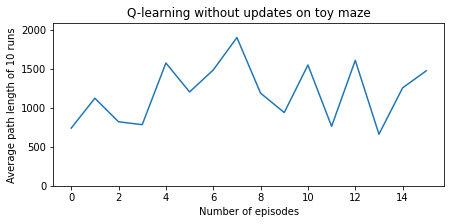

In [40]:
#1.4

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
rewards = [(9, 9, 10)]
eps=0.1
alfa=0.7
gamma=0.9
max_iter=30000
max_episodes=16
steps_per_episode = []
runs_reaching_episode = []


for i in range(10):
    reward_coordinates = set()
    for reward in rewards:
        maze.set_reward(maze.get_state(reward[0], reward[1]), reward[2])
        reward_coordinates.add(State(reward[0], reward[1], 1))

    # create dictions with algorithms history
    steps_per_iter = list()

    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()

    episode = 0
    stop = False
    steps = 0
    iterations = 0
    # keep learning until you decide to stop
    while not stop:
        # Get next action
        current_action = selection.get_egreedy_action(agent=robot, maze=maze, q_learning=learn, epsilon=eps)
        
        # Initialize variables for a learn update
        current_state = robot.get_state(maze)
        state_next = robot.do_action(action=current_action, maze=maze)
        r = maze.get_reward(robot.get_state(maze))
        possible_actions = maze.get_valid_actions(robot)
        
        # Update Q(s,a) matrix
        #learn.update_q(state=current_state, action=current_action, r=r, state_next=state_next, possible_actions=possible_actions, alfa=alfa, gamma=gamma)
        
        # Number of iterations stopping criterion
        iterations += 1
        if max_iter == iterations:
            break
        if robot.get_state(maze) in reward_coordinates:
            steps_per_iter.append((robot.nr_of_actions_since_reset, 0))
            # Number of episodes stopping criterion
            episode += 1
            if episode == max_episodes:
                break
            robot.reset()

    res = steps_per_iter

    for i in range(len(res)):
        if i >= len(runs_reaching_episode):
            runs_reaching_episode.append(0)
        if i >= len(steps_per_episode):
            steps_per_episode.append([0 for i in rewards])
    
    for i in range(len(res)):
        reward_number = res[i][1]
        steps_per_episode[i][reward_number] += res[i][0]
        runs_reaching_episode[i] += 1

print(steps_per_episode)
print(runs_reaching_episode)

x = np.array(range(len(runs_reaching_episode)))
y = np.array(steps_per_episode).T[0] / np.array(runs_reaching_episode)

print(y.tolist())
plt.figure(figsize=(7,3))
plt.title("Q-learning without updates on toy maze")
plt.xlabel('Number of episodes')
plt.ylabel('Average path length of 10 runs')
plt.plot(x.tolist(), y.tolist())
plt.ylim(0, np.max(y)*1.1)

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
[(582, 0), (328, 0), (838, 0), (624, 0), (242, 0), (284, 0), (100, 0), (392, 0), (114, 0), (226, 0), (172, 0), (134, 0), (64, 0), (46, 0), (590, 0), (144, 0), (46, 0), (90, 0), (98, 0), (66, 0), (36, 0), (74, 0), (24, 0), (26, 0), (26, 0), (34, 0), (24, 0), (38, 0), (24, 0), (24, 0), (28, 0), (30, 0), (26, 0), (24, 0), (28, 0), (26, 0), (26, 0), (26, 0), (30, 0), (24, 0)]
Made EGreedy
[(294, 0), (4160, 0), (720, 0), (214, 0), (868, 0), (1328, 0), (182, 0), (544, 0), (192, 0), (166, 0), (214, 0), (210, 0), (220, 0), (138, 0), (134, 0), (62, 0), (236, 0), (556, 0), (116, 0), (122, 0), (148, 0), (86, 0), (32, 0), (60, 0), (38, 0), (24, 0), (26, 0), (24, 0), (24, 0), (24, 0), (36, 0), (28, 0), (32, 0), (26, 0), (28, 0), (24, 0), (28, 0), (30, 0), (30, 0), (24, 0)]
Made EGreedy
[(1512, 0), (3858, 0), (212, 0), (82, 0), (198, 0), (262, 0), (188, 0), (210, 0), (656, 0), (210, 0), (194, 0), (254, 0), (344, 0), (242, 0), (166, 0), (422, 

(0.0, 1558.26)

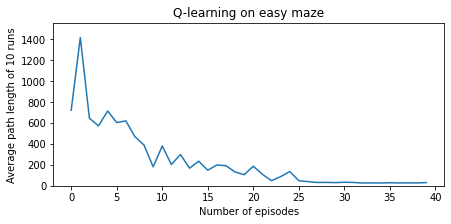

In [42]:
#1.5 and 1.6

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
rewards = [(9, 9, 10)]

steps_per_episode = []
runs_reaching_episode = []

alfa = 0.7
gamma = 0.9
max_episodes = 40
max_iterations = 30000*3
eps = 0.1

for runNumber in range(10):
    res = main_algo(alfa=alfa, gamma=gamma, max_episodes=max_episodes, max_iter=max_iterations, eps=eps, maze=maze, rewards=rewards)
    print(res)

    for i in range(len(res)):
        if i >= len(runs_reaching_episode):
            runs_reaching_episode.append(0)
        if i >= len(steps_per_episode):
            steps_per_episode.append([0 for i in rewards])
    
    for i in range(len(res)):
        reward_number = res[i][1]
        steps_per_episode[i][reward_number] += res[i][0]
        runs_reaching_episode[i] += 1

import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

x = np.array(range(len(runs_reaching_episode)))
y = np.array(steps_per_episode).T[0] / np.array(runs_reaching_episode)

print(y.tolist())
plt.figure(figsize=(7,3))
plt.title("Q-learning on easy maze")
plt.xlabel('Number of episodes')
plt.ylabel('Average path length of 10 runs')
plt.plot(x.tolist(), y.tolist())
plt.ylim(0, np.max(y)*1.1)
#plt.savefig("Q_learning_on_toy_maze.png")

Ready reading maze file ../data/easy_maze.txt
Made EGreedy
[(6046, 0), (214, 0), (5942, 0), (434, 0), (5182, 0), (3880, 0), (2538, 0), (538, 0), (198, 0), (172, 0), (5708, 0), (19360, 0), (200, 0), (128, 0), (750, 0), (6138, 0), (118, 0), (9446, 0), (4322, 0), (28, 0), (2206, 0), (1896, 0), (1288, 0), (262, 0), (86, 0), (212, 0), (98, 0), (62, 0), (80, 0), (22, 0), (26, 0), (24, 0), (22, 0), (22, 0), (22, 0), (22, 0), (22, 0), (22, 0), (22, 0), (22, 0)]
Made EGreedy
[(3162, 0), (1268, 0), (2994, 0), (3188, 0), (384, 0), (2402, 0), (2452, 0), (568, 0), (456, 0), (616, 0), (4394, 0), (66, 0), (800, 0), (370, 0), (16376, 0), (516, 0), (190, 0), (60, 0), (2072, 0), (88, 0), (26, 0), (32, 0), (112, 0), (26, 0), (30, 0), (26, 0), (22, 0), (22, 0), (22, 0), (22, 0), (22, 0), (22, 0), (22, 0), (22, 0), (22, 0), (22, 0), (22, 0), (22, 0), (22, 0), (22, 0)]
Made EGreedy
[(562, 0), (686, 0), (8692, 0), (3910, 0), (100, 0), (132, 0), (2692, 0), (2020, 0), (5834, 0), (400, 0), (714, 0), (4064, 0), 

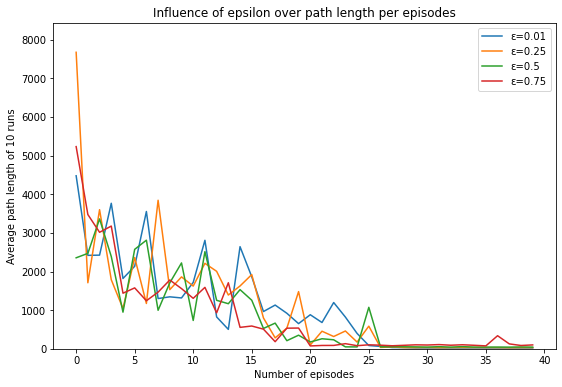

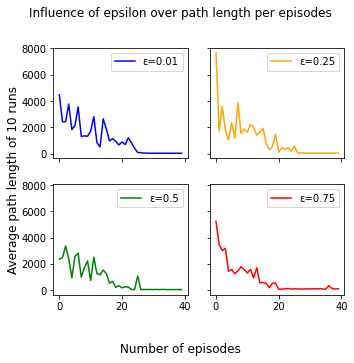

In [50]:
#1.7

# Load the maze
file = "../data/easy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
rewards = [(9, 9, 10)]

steps_per_episode = []
runs_reaching_episode = []

alfa = 0.7
gamma = 0.9
max_episodes = 40
max_iterations = 30000*4
epsilons = [0.01, 0.25, 0.5, 0.75]

for ind, eps in enumerate(epsilons):
    steps_per_episode.append([])
    runs_reaching_episode.append([])

    for runNumber in range(10):
        res = main_algo(alfa=alfa, gamma=gamma, max_episodes=max_episodes, max_iter=max_iterations, eps=eps, maze=maze, rewards=rewards)
        print(res)

        for i in range(len(res)):
            if i >= len(runs_reaching_episode[ind]):
                runs_reaching_episode[ind].append(0)
            if i >= len(steps_per_episode[ind]):
                steps_per_episode[ind].append([0 for i in rewards])
        
        for i in range(len(res)):
            reward_number = res[i][1]
            steps_per_episode[ind][i][reward_number] += res[i][0]
            runs_reaching_episode[ind][i] += 1

import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

plt.figure(figsize=(9, 6))
plt.title("Influence of epsilon over path length per episodes")

max_y = 0
for ind, eps in enumerate(epsilons):
    max_y = max(max_y, np.max(np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])) * 1.1)

print(max_y)

for ind, eps in enumerate(epsilons):
    x = np.array(range(len(runs_reaching_episode[ind])))
    y = np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])

    print(y.tolist())
    plt.plot(x.tolist(), y.tolist(), label=("ε=" + str(eps)))
    plt.xlabel('Number of episodes')
    plt.ylabel('Average path length of 10 runs')
    plt.ylim(0, max_y)
plt.legend()

import matplotlib.pyplot as plt
import numpy as np

fig, plt_ind = plt.subplots(2, 2, sharex=True, sharey=True)

fig.suptitle("Influence of epsilon over path length per episodes")
fig.supxlabel('Number of episodes')
fig.supylabel('Average path length of 10 runs')
fig.tight_layout()

print(plt_ind)

color = ['blue', 'orange', 'green', 'red']

fig.set_size_inches((5, 5))
for ind, eps in enumerate(epsilons):
    x = np.array(range(len(runs_reaching_episode[ind])))
    y = np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])

    print(y.tolist())
    plt_ind[(ind//2, ind % 2)].plot(x.tolist(), y.tolist(), label=("ε=" + str(eps)), c=color[ind])
    #plt_ind[(ind//2, ind % 2)].set(xlabel='', ylabel='')
    #plt_ind[(ind//2, ind % 2)].ylim(0, max_y)
    plt_ind[(ind//2, ind % 2)].legend()
    plt_ind[(ind//2, ind % 2)].label_outer()

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
[(578, 0), (974, 0), (308, 0), (1652, 0), (208, 0), (994, 0), (344, 0), (570, 0), (310, 0), (674, 0), (314, 0), (112, 0), (204, 0), (286, 0), (468, 0), (226, 0), (78, 0), (52, 0), (116, 0), (90, 0), (52, 0), (76, 0), (26, 0), (110, 0), (40, 0), (54, 0), (32, 0), (28, 0), (30, 0), (26, 0), (26, 0), (30, 0), (30, 0), (34, 0), (24, 0), (24, 0), (28, 0), (24, 0), (26, 0), (34, 0), (30, 0), (28, 0), (26, 0), (112, 0), (28, 0), (26, 0), (26, 0), (34, 0), (28, 0), (28, 0)]
Made EGreedy
[(2084, 0), (1412, 0), (556, 0), (758, 0), (354, 0), (66, 0), (670, 0), (1114, 0), (256, 0), (200, 0), (442, 0), (202, 0), (146, 0), (176, 0), (300, 0), (112, 0), (100, 0), (306, 0), (166, 0), (62, 0), (178, 0), (92, 0), (36, 0), (108, 0), (88, 0), (30, 0), (28, 0), (28, 0), (28, 0), (26, 0), (30, 0), (26, 0), (24, 0), (26, 0), (26, 0), (40, 0), (26, 0), (28, 0), (26, 0), (24, 0), (28, 0), (28, 0), (26, 0), (24, 0), (26, 0), (30, 0), (26, 0), (36, 0), (2

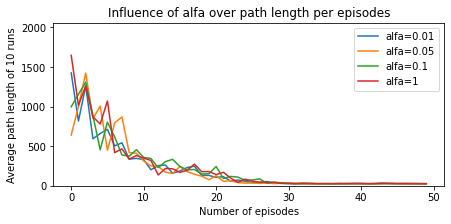

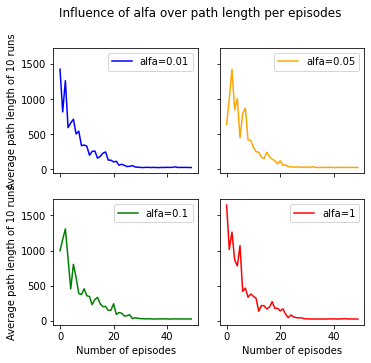

In [53]:
#1.9

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
rewards = [(9, 9, 10)]

steps_per_episode = []
runs_reaching_episode = []

alfas = [0.01, 0.05, 0.1, 1]
gamma = 0.9
max_episodes = 50
max_iterations = 30000 * 4
eps = 0.1

for ind, alfa in enumerate(alfas):
    steps_per_episode.append([])
    runs_reaching_episode.append([])

    for runNumber in range(10):
        res = main_algo(alfa=alfa, gamma=gamma, max_episodes=max_episodes, max_iter=max_iterations, eps=eps, maze=maze, rewards=rewards)
        print(res)

        for i in range(len(res)):
            if i >= len(runs_reaching_episode[ind]):
                runs_reaching_episode[ind].append(0)
            if i >= len(steps_per_episode[ind]):
                steps_per_episode[ind].append([0 for i in rewards])
        
        for i in range(len(res)):
            reward_number = res[i][1]
            steps_per_episode[ind][i][reward_number] += res[i][0]
            runs_reaching_episode[ind][i] += 1

import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

plt.figure(figsize=(7, 3))
plt.title("Influence of alfa over path length per episodes")

max_y = 0
for ind, eps in enumerate(epsilons):
    max_y = max(max_y, np.max(np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])) * 1.25)

print(max_y)

for ind, alfa in enumerate(alfas):
    x = np.array(range(len(runs_reaching_episode[ind])))
    y = np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])

    print(y.tolist())
    plt.plot(x.tolist(), y.tolist(), label=("alfa=" + str(alfa)))
    plt.xlabel('Number of episodes')
    plt.ylabel('Average path length of 10 runs')
    plt.ylim(0, max_y)
plt.legend()

import matplotlib.pyplot as plt
import numpy as np

#print(steps_per_episode)
#print(runs_reaching_episode)

fig, plt_ind = plt.subplots(2, 2, sharex=True, sharey=True)

fig.suptitle("Influence of alfa over path length per episodes")
fig.tight_layout()

print(plt_ind)

color = ['blue', 'orange', 'green', 'red']

fig.set_size_inches((5, 5))

for ind, alfa in enumerate(alfas):
    x = np.array(range(len(runs_reaching_episode[ind])))
    y = np.array(steps_per_episode[ind]).T[0] / np.array(runs_reaching_episode[ind])

    print(y.tolist())
    plt_ind[(ind//2, ind % 2)].plot(x.tolist(), y.tolist(), label=("alfa=" + str(alfa)), c=color[ind])
    plt_ind[(ind//2, ind % 2)].set(xlabel='Number of episodes', ylabel='Average path length of 10 runs')
    #plt_ind[(ind//2, ind % 2)].ylim(0, 1000)
    plt_ind[(ind//2, ind % 2)].legend()
    plt_ind[(ind//2, ind % 2)].label_outer()

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
[(894, 0), (529, 1), (1651, 1), (202, 0), (804, 0), (868, 0), (532, 0), (148, 0), (294, 0), (254, 0), (268, 0), (88, 0), (144, 0), (200, 0), (234, 0), (298, 0), (276, 0), (94, 0), (178, 0), (178, 0), (118, 0), (122, 0), (116, 0), (108, 0), (28, 0), (40, 0), (26, 0), (31, 1), (28, 0), (24, 0), (34, 0), (28, 0), (28, 0), (24, 0), (30, 0), (24, 0), (24, 0), (24, 0), (28, 0), (28, 0), (26, 0), (50, 0), (30, 0), (24, 0), (26, 0), (34, 0), (26, 0), (30, 0), (23, 1), (28, 0), (32, 0), (26, 0), (26, 0), (24, 0), (28, 0), (26, 0), (26, 0), (26, 0), (24, 0), (30, 0), (28, 0), (26, 0), (24, 0), (28, 0), (34, 0), (28, 0), (26, 0), (28, 0), (26, 0), (26, 0), (28, 0), (24, 0), (24, 0), (30, 0), (24, 0), (28, 0), (26, 0), (26, 0), (24, 0), (26, 0), (24, 0), (24, 0), (26, 0), (30, 0), (26, 0), (32, 0), (26, 0), (24, 0), (24, 0), (32, 0), (30, 0), (24, 0), (26, 0), (26, 0), (24, 0), (24, 0), (26, 0), (24, 0), (26, 0), (26, 0), (24, 0), (32, 0), 

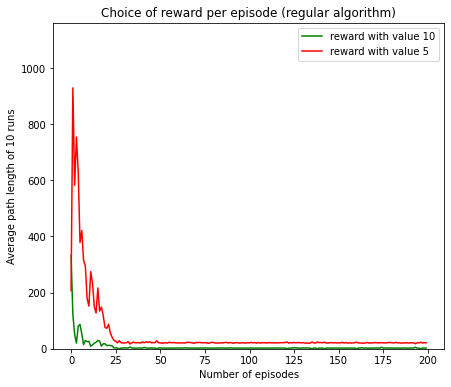

In [58]:
#1.3.10
# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)
#maze.visualize()
# Set the reward at the bottom right to 10
rewards = [(9, 9, 10), (9, 0, 5)]

steps_per_episode = []
runs_reaching_episode = []

alfa = 0.7
gamma = 0.9
max_episodes = 200
max_iterations = 30000 * 4
start_eps = 0.1


for runNumber in range(10):
    res = main_algo(alfa=alfa, gamma=gamma, eps=start_eps, max_episodes=max_episodes, max_iter=max_iterations, maze=maze, rewards=rewards)
    print(res)

    for i in range(len(res)):
        if i >= len(runs_reaching_episode):
            runs_reaching_episode.append(0)
        if i >= len(steps_per_episode):
            steps_per_episode.append([0 for i in rewards])
    
    for i in range(len(res)):
        reward_number = res[i][1]
        steps_per_episode[i][reward_number] += res[i][0]
        runs_reaching_episode[i] += 1

import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

color = ['green', 'red']

max_y = 0
for i in range(len(rewards)):
    max_y = max(max_y, np.max(np.array(steps_per_episode).T[i] / np.array(runs_reaching_episode)) * 1.25)

print(max_y)
plt.figure(figsize=(7,6))
plt.title("Choice of reward per episode (regular algorithm)")
plt.xlabel('Number of episodes')
plt.ylabel('Average path length of 10 runs')
for i in range(len(rewards)):
    x = np.array(range(len(runs_reaching_episode)))
    y = np.array(steps_per_episode).T[i] / np.array(runs_reaching_episode)

    print(y.tolist())
    plt.plot(x.tolist(), y.tolist(), label=("reward with value " + str(rewards[i][2])), c=color[i])
plt.ylim(0, max_y)
plt.legend()

Ready reading maze file ../data/toy_maze.txt
[[1, 1, 0, 1, 0, 1, 0, 0, 0, 1], [0, 1, 1, 1, 0, 1, 1, 1, 0, 1], [0, 1, 0, 0, 0, 0, 0, 1, 0, 1], [0, 1, 0, 1, 1, 1, 0, 1, 1, 1], [0, 1, 0, 1, 0, 1, 1, 1, 0, 1], [0, 1, 0, 1, 0, 0, 0, 1, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [1, 0, 1, 1, 1, 1, 1, 1, 0, 1]]
[[  0   0 100   0 100   0 100 100 100   0]
 [100   0   0   0 100   0   0   0 100   0]
 [100   0 100 100 100 100 100   0 100   0]
 [100   0 100   0   0   0 100   0   0   0]
 [100   0 100   0 100   0   0   0 100   0]
 [100   0 100   0 100 100 100   0 100   0]
 [  0   0   0   0   0   0   0   0 100   0]
 [  0 100   0 100 100 100 100   0 100   0]
 [  0 100   0 100 100 100 100   0 100   0]
 [  0 100   0   0   0   0   0   0 100   0]]


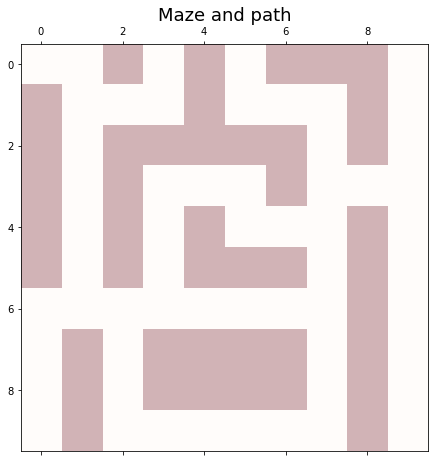

Made EGreedy
[(108, 0), (312, 0), (1284, 0), (3157, 1), (2449, 1), (233, 1), (1226, 0), (1483, 1), (698, 0), (348, 0), (265, 1), (129, 1), (898, 0), (106, 0), (106, 0), (189, 1), (146, 0), (832, 0), (688, 0), (253, 1), (677, 1), (92, 0), (190, 0), (242, 0), (105, 1), (277, 1), (140, 0), (64, 0), (236, 0), (468, 0), (121, 1), (230, 0), (78, 0), (208, 0), (106, 0), (110, 0), (71, 1), (386, 0), (218, 0), (137, 1), (74, 0), (88, 0), (76, 0), (170, 0), (150, 0), (83, 1), (217, 1), (120, 0), (116, 0), (80, 0), (108, 0), (90, 0), (118, 0), (158, 0), (132, 0), (74, 0), (82, 0), (70, 0), (90, 0), (155, 1), (110, 0), (52, 0), (48, 0), (158, 0), (104, 0), (76, 0), (180, 0), (88, 0), (88, 0), (58, 0), (122, 0), (79, 1), (86, 0), (166, 0), (66, 0), (52, 0), (128, 0), (98, 0), (66, 0), (84, 0), (48, 0), (99, 1), (60, 0), (66, 0), (57, 1), (76, 0), (124, 0), (48, 0), (68, 0), (54, 0), (42, 0), (89, 1), (116, 0), (70, 0), (116, 0), (44, 0), (62, 0), (73, 1), (47, 1), (86, 0), (86, 0), (112, 0), (54, 0

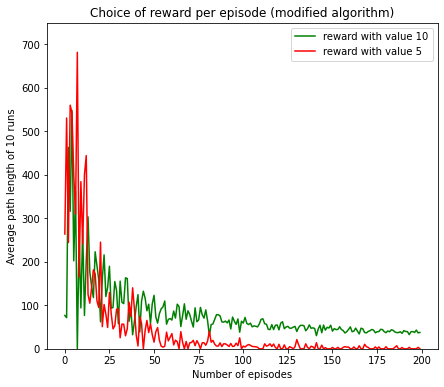

In [59]:
#1.3.11
def mod_algo(maze: Maze, rewards, start_eps=0.1, min_eps=0.1, mult_eps=0.9,alfa=0.7, gamma=0.9, max_iter=30000, max_episodes=16):
    reward_coordinates = dict()
    for i in range(len(rewards)):
        reward = rewards[i]
        maze.set_reward(maze.get_state(reward[0], reward[1]), reward[2])
        reward_coordinates[State(reward[0], reward[1], 1)] = i

    # create dictions with algorithms history
    steps_per_iter = list()

    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()

    episode = 0
    stop = False
    steps = 0
    iterations = 0
    eps = start_eps

    # keep learning until you decide to stop
    while not stop:
        # Get next action
        current_action = selection.get_egreedy_action(agent=robot, maze=maze, q_learning=learn, epsilon=eps)
        
        # Initialize variables for a learn update
        current_state = robot.get_state(maze)
        state_next = robot.do_action(action=current_action, maze=maze)
        r = maze.get_reward(robot.get_state(maze))
        possible_actions = maze.get_valid_actions(robot)
        
        # Update Q(s,a) matrix
        learn.update_q(state=current_state, action=current_action, r=r, state_next=state_next, possible_actions=possible_actions, alfa=alfa, gamma=gamma)
        
        # Number of iterations stopping criterion
        iterations += 1
        if max_iter == iterations:
            break

        if robot.get_state(maze) in reward_coordinates:
            steps_per_iter.append((robot.nr_of_actions_since_reset, reward_coordinates[robot.get_state(maze)]))
            # Number of episodes stopping criterion
            episode += 1
            if episode == max_episodes:
                break
            robot.reset()

            eps *= mult_eps
            eps = max(eps, min_eps)


    return steps_per_iter

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)
maze.visualize()
# Set the reward at the bottom right to 10
rewards = [(9, 9, 10), (9, 0, 5)]

steps_per_episode = []
runs_reaching_episode = []

alfa = 0.7
gamma = 0.9
max_episodes = 200
max_iterations = 30000 * 2
start_eps = 1
min_eps = 0.2
mult_eps = 0.995


for runNumber in range(10):
    res = mod_algo(alfa=alfa, gamma=gamma, start_eps=start_eps, min_eps=min_eps, mult_eps=mult_eps, max_episodes=max_episodes, max_iter=max_iterations, maze=maze, rewards=rewards)
    print(res)

    for i in range(len(res)):
        if i >= len(runs_reaching_episode):
            runs_reaching_episode.append(0)
        if i >= len(steps_per_episode):
            steps_per_episode.append([0 for i in rewards])
    
    for i in range(len(res)):
        reward_number = res[i][1]
        steps_per_episode[i][reward_number] += res[i][0]
        runs_reaching_episode[i] += 1

import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

color = ['green', 'red']

max_y = 0
for i in range(len(rewards)):
    max_y = max(max_y, np.max(np.array(steps_per_episode).T[i] / np.array(runs_reaching_episode)) * 1.1)

print(max_y)

plt.figure(figsize=(7,6))
plt.title("Choice of reward per episode (modified algorithm)")
plt.xlabel('Number of episodes')
plt.ylabel('Average path length of 10 runs')
for i in range(len(rewards)):
    x = np.array(range(len(runs_reaching_episode)))
    y = np.array(steps_per_episode).T[i] / np.array(runs_reaching_episode)

    print(y.tolist())
    plt.plot(x.tolist(), y.tolist(), label=("reward with value " + str(rewards[i][2])), c=color[i])
plt.ylim(0, max_y)
plt.legend()